In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
titanic.set_index('PassengerId', inplace=True)
titanic_test.set_index('PassengerId', inplace=True)
gender_submission.set_index('PassengerId', inplace=True)

In [4]:
titanic_clean = titanic.copy()
median = titanic_clean['Age'].median()
print('age median {}'.format(median)) 

titanic_clean['Age'].fillna(median, inplace=True)
max_embarked = titanic_clean['Embarked'].value_counts().idxmax()
titanic_clean['Embarked'].fillna(max_embarked, inplace=True)
print('embarked most freq={}'.format(max_embarked))

age median 28.0
embarked most freq=S


In [5]:
titanic_clean[titanic_clean['Age'].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [6]:
titanic.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

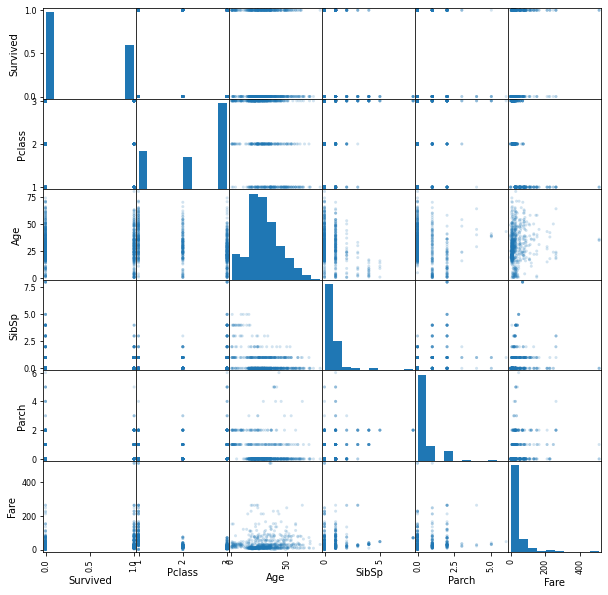

In [7]:
pd.plotting.scatter_matrix(titanic, alpha=0.2, figsize=(10,10))
#plt.figure(figsize=(2,2))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# train, test = train_test_split(titanic_clean, random_state=5, test_size=0.2)
train, test = train_test_split(titanic, random_state=5, test_size=0.15)
train[train['Age'].isnull()]

Survived  Pclass  \
PassengerId                     
649                 0       3   
681                 0       3   
251                 0       3   
426                 0       3   
335                 1       1   
...               ...     ...   
6                   0       3   
432                 1       3   
66                  1       3   
412                 0       3   
741                 1       1   

                                                          Name     Sex  Age  \
PassengerId                                                                   
649                                         Willey, Mr. Edward    male  NaN   
681                                        Peters, Miss. Katie  female  NaN   
251                                     Reed, Mr. James George    male  NaN   
426                                     Wiseman, Mr. Phillippe    male  NaN   
335          Frauenthal, Mrs. Henry William (Clara Heinshei...  female  NaN   
...                                                        ...     ...  ...   
6                                             Moran, Mr. James    male  NaN   
432          Thorneycroft, Mrs. Percival (Florence Kate White)  female  NaN   
66                                    Moubarek, Master. Gerios    male  NaN   
412                                            Hart, Mr. Henry    male  NaN   
741                                Hawksford, Mr. Walter James    male  NaN   

             SibSp  Parch         Ticket      Fare Cabin Embarked  
PassengerId                                                        
649              0      0  S.O./P.P. 751    7.5500   NaN        S  
681              0      0         330935    8.1375   NaN        Q  
251              0      0         362316    7.2500   NaN        S  
426              0      0     A/4. 34244    7.2500   NaN        S  
335              1      0       PC 17611  133.6500   NaN        S  
...            ...    ...            ...       ...   ...      ...  
6                0      0         330877    8.4583   NaN        Q  
432              1      0         376564   16.1000   NaN        S  
66               1      1           2661   15.2458   NaN        C  
412              0      0         394140    6.8583   NaN        Q  
741              0      0          16988   30.0000   D45        S  

[154 rows x 11 columns]

Pierwotnie miałem użyć takiego generycznego transformatora, w po podziale na train/test
w train nie znajdą się wszystkie tytuły.
Miałem błąd:

```
ValueError: Found unknown categories ['the', 'Ms.', 'Sir.'] in column 0 during transform
```

W przypadku "the" jest to rekord"  `'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'`

In [9]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

np.c_[np.array([1,2,3]), np.array([7,7,7]), np.array([4,5,6])]
from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.preprocessing import 
def extract_title(name):
    v = name.split(',')[1]
    return v[0:v.index('.')+1].strip()

def get_title(frame):
    return frame.transform(extract_title)

class TitleExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X):
        return self
    def transform(self, X):
        return X.transform(get_title)
titles = get_title(titanic['Name']).unique()
print(TitleExtractor().transform(train[['Name']]).groupby('Name').count())
titleEncoder = OrdinalEncoder(categories=[titles], handle_unknown='use_encoded_value', unknown_value=len(titles)+1)
titleEncoder = OneHotEncoder(categories=[titles], handle_unknown='ignore')
title_pipeline = Pipeline(steps=[
                    ('title', TitleExtractor()),
                    ('title_enc', titleEncoder)
                ])
title_pipeline.fit_transform(train[['Name']])
# titlePipeline = Pipeline(
#     steps=[
#         ('extract_title', TitleExtractor()),
        
#     ]
# )
# name = train[['Name']]
    
# train['Name'].transform(get_title)
# #train[[]'Name']
#FunctionTransformer(get_title).transform(train[['Name']])

Empty DataFrame
Columns: []
Index: [Capt., Col., Don., Dr., Jonkheer., Lady., Major., Master., Miss., Mlle., Mme., Mr., Mrs., Rev.]


<757x17 sparse matrix of type '<class 'numpy.float64'>'
	with 757 stored elements in Compressed Sparse Row format>

In [10]:
cabins = titanic['Cabin'].fillna('U').unique()

In [11]:

cabinEncoder = OneHotEncoder(categories=[cabins], handle_unknown='ignore')
cabin_pipeline = Pipeline(steps=[
                    ('cabin_enc', cabinEncoder)
                ])
cabin_pipeline.fit_transform(train[['Cabin']])

<757x148 sparse matrix of type '<class 'numpy.float64'>'
	with 176 stored elements in Compressed Sparse Row format>

In [12]:
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

transformer = ColumnTransformer(
        
    [
        # TODO: dodaj Cabin i Ticket 
        ('num', numeric_transformer, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
        ('cabin', OneHotEncoder(handle_unknown='ignore', sparse=False), ['Cabin']),
        ('embarked', OneHotEncoder(handle_unknown='ignore', sparse=False), ['Embarked']),
        ('sex', OrdinalEncoder(), ['Sex']),
        ('title', title_pipeline, ['Name'])
    ]
)

x = transformer.fit_transform(train.drop('Survived', axis=1))
print("Data size {}".format(x.shape[0]*x.shape[1]))   # daje 121k wiec niewiele. Zmienilem flage sparse=False bo niektore
# algorytmy np. (PCA) nie tolerują macierzy rzadkich.
print(x)

Data size 121120
[[-0.36740461 -0.95557136 -0.47434351 ...  0.          0.
   0.        ]
 [-0.36740461  1.56956009 -0.47434351 ...  0.          0.
   0.        ]
 [ 0.82626617  1.64607923 -0.47434351 ...  0.          0.
   0.        ]
 ...
 [-1.5610754   0.42177307 -0.47434351 ...  0.          0.
   0.        ]
 [ 0.82626617  0.19221566  0.46319706 ...  0.          0.
   0.        ]
 [-1.5610754   0.11569653 -0.47434351 ...  0.          0.
   0.        ]]


In [13]:
print(train.shape)
print(test.shape)
print(transformer.transform(train.drop('Survived', axis=1)).shape)
print(transformer.transform(test.drop('Survived', axis=1)).shape)
print(transformer.transform(train.drop('Survived', axis=1)).shape)
print(transformer.transform(test.drop('Survived', axis=1)).shape)

(757, 11)
(134, 11)
(757, 160)
(134, 160)
(757, 160)
(134, 160)


In [14]:
y = train['Survived']

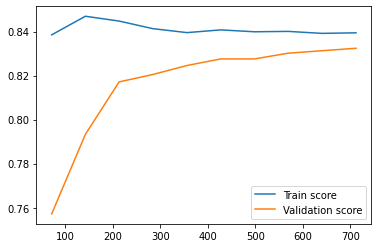

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
#from sklearn.linear_model import SGDRegressor
cv = ShuffleSplit(n_splits=15, test_size=0.2, random_state=0)
xx=transformer.transform(titanic.drop('Survived', axis=1))
yy=titanic['Survived']
# TODO: dlaczego SGDClassifier jest taki "chaotyczny"
# data=learning_curve(SGDClassifier(penalty='elasticnet'),xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 15))
# data=learning_curve(LogisticRegression(C=1000), xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 15), n_jobs=5, shuffle=False, random_state=0)
data=learning_curve(SVC(C=0.5),xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.plot(data[0], np.mean(data[1], axis=1), label='Train score')
plt.plot(data[0], np.mean(data[2], axis=1), label='Validation score')
plt.legend()
plt.show()


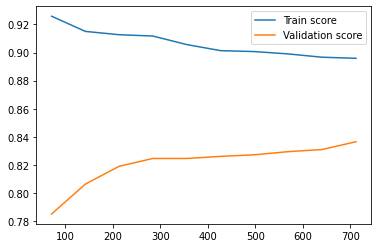

In [16]:
data=learning_curve(SVC(C=5),xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.plot(data[0], np.mean(data[1], axis=1), label='Train score')
plt.plot(data[0], np.mean(data[2], axis=1), label='Validation score')
plt.legend()
plt.show()


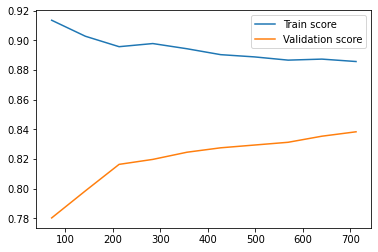

In [17]:
data=learning_curve(SVC(C=5, kernel='poly', degree=2),xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.plot(data[0], np.mean(data[1], axis=1), label='Train score')
plt.plot(data[0], np.mean(data[2], axis=1), label='Validation score')
plt.legend()
plt.show()

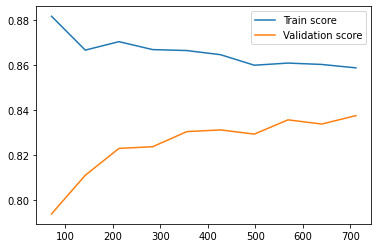

In [18]:

data=learning_curve(LogisticRegression(C=1.5),xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.plot(data[0], np.mean(data[1], axis=1), label='Train score')
plt.plot(data[0], np.mean(data[2], axis=1), label='Validation score')
plt.legend()
plt.show()

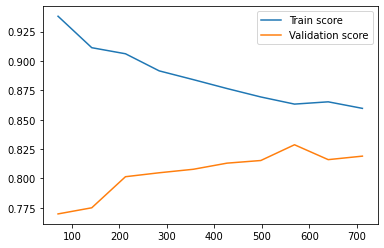

In [19]:
from sklearn.tree import DecisionTreeClassifier
data=learning_curve(DecisionTreeClassifier(max_depth=5),xx, yy, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.plot(data[0], np.mean(data[1], axis=1), label='Train score')
plt.plot(data[0], np.mean(data[2], axis=1), label='Validation score')
plt.legend()
plt.show()

In [20]:
sgd = SGDClassifier()
sgd.fit(x, y)

SGDClassifier()

In [21]:
record = test[:1]
print(x.shape)
transformed = transformer.transform(record.drop('Survived', axis=1))
print(record)
print("TRANSFORMED: shape={}".format(transformed.shape))
print(transformed)
predicted = sgd.predict(transformed)
actual = record['Survived'].values
print("predicted={}, actual={}".format(predicted, actual))
actual

(757, 160)
             Survived  Pclass                 Name   Sex  Age  SibSp  Parch  \
PassengerId                                                                   
127                 0       3  McMahon, Mr. Martin  male  NaN      0      0   

             Ticket  Fare Cabin Embarked  
PassengerId                               
127          370372  7.75   NaN        Q  
TRANSFORMED: shape=(1, 160)
[[ 0.82626617 -0.11386088 -0.47434351 -0.46889406 -0.55510755  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.


array([0], dtype=int64)

In [22]:
test['Survived']

PassengerId
127    0
355    0
591    0
510    1
770    0
      ..
862    0
788    0
483    0
38     0
214    0
Name: Survived, Length: 134, dtype: int64

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
try:
    score = cross_val_score(sgd, transformer.transform(test.drop('Survived', axis=1)), test['Survived'], cv=10, scoring='neg_mean_squared_error')
# astype bylo potrzebne aby nie drukowal w scientific notation
    print(np.sqrt(-score))
except:
    pass

[0.46291005 0.46291005 0.37796447 0.70710678 0.39223227 0.48038446
 0.39223227 0.48038446 0.2773501  0.48038446]


In [24]:
from sklearn.metrics import mean_squared_error
pred=sgd.predict(transformer.transform(test.drop('Survived', axis=1)))
print(np.sqrt(mean_squared_error(test['Survived'], pred)))

0.45711620391383745


In [25]:
sgd.score(transformer.transform(test.drop('Survived', axis=1)), test['Survived'])

0.7910447761194029

In [26]:
titanic.shape
titanic_test.shape
for_pred = transformer.transform(titanic_test)
pred = sgd.predict(for_pred)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
output = pd.DataFrame(data=pred, index=titanic_test.index, columns = ['Survived'])
output.to_csv('predicted.csv')

In [28]:
from sklearn.model_selection import GridSearchCV
params=[{
    'loss': ['hinge', 'log'],
    'penalty': ['l1', 'l2'],
    'alpha': [0.00001, 0.000001, 0.0001, 0.001, 0.01]
},
    {
        
    }
]
sgd = SGDClassifier()
grid = GridSearchCV(sgd, params)
grid.fit(x, y)
grid.best_estimator_
grid.estimator
#pred=sgd.predict(transformer.transform(test.drop('Survived', axis=1)))
#sgd.score(transformer.transform(test.drop('Survived', axis=1)), test['Survived'])

SGDClassifier()

In [29]:
grid.best_score_

0.828215406064831

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.02170444, 0.00760608, 0.01759667, 0.01159701, 0.00861473,
        0.00522161, 0.01318626, 0.00676503, 0.01339936, 0.0077992 ,
        0.02099876, 0.00899916, 0.01079888, 0.00639186, 0.00959706,
        0.0064003 , 0.00789833, 0.00620031, 0.00580406, 0.00500345,
        0.0079958 ]),
 'std_fit_time': array([0.00268032, 0.00136448, 0.00531682, 0.00326366, 0.00243534,
        0.00158414, 0.0035575 , 0.00223689, 0.00326218, 0.0017207 ,
        0.00502014, 0.00219078, 0.00416697, 0.00080395, 0.00079942,
        0.00119638, 0.00192216, 0.00039995, 0.00116871, 0.00063116,
        0.00200042]),
 'mean_score_time': array([0.00099959, 0.00079441, 0.00040312, 0.00100303, 0.00080047,
        0.00078335, 0.00101571, 0.00070658, 0.00080099, 0.00100088,
        0.00100117, 0.00080085, 0.00060053, 0.00080643, 0.00080218,
        0.00080104, 0.00060544, 0.00059986, 0.00080204, 0.00079627,
        0.00060363]),
 'std_score_time': array([1.81949463e-06, 3.97283568e-04, 4.937375

In [31]:
params=[{
    'C': [0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 100, 1000]
}
]
grid_svc = GridSearchCV(SVC(), params)
grid_svc.fit(x, y)
print(grid_svc.best_estimator_)
print(grid_svc.estimator)
print(grid_svc.best_score_)

SVC(C=5)
SVC()
0.8308469850121994


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)
rf.score(transformer.transform(test.drop('Survived', axis=1)), test['Survived'])

0.7985074626865671

In [33]:
for_pred = transformer.transform(titanic_test)
pred = rf.predict(for_pred)
output = pd.DataFrame(data=pred, index=titanic_test.index, columns = ['Survived'])
output.to_csv('predicted-randomforest.csv')

In [34]:

from sklearn.tree import plot_tree
res = DecisionTreeClassifier(max_depth=10).fit(x, y)
res


DecisionTreeClassifier(max_depth=10)

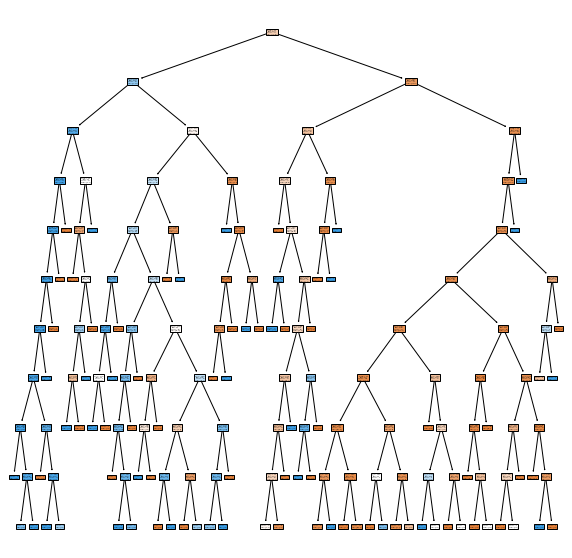

In [35]:
plt.figure(figsize=(10,10))
plot_tree(res, filled=True)
plt.show()

In [36]:
params=[{
    'max_depth': [5,6,7,9,10,12, 15, 20, 25]
}
]
grid_tree = GridSearchCV(DecisionTreeClassifier(), params)
grid_tree.fit(x, y)
print(grid_tree.best_estimator_)
print(grid_tree.estimator)
print(grid_tree.best_score_)

DecisionTreeClassifier(max_depth=5)
DecisionTreeClassifier()
0.805681422098292


In [37]:
pca_pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('pca', PCA(n_components=30))
])
x_pca = pca_pipeline.fit_transform(train.drop('Survived', axis=1))
x_pca_test = pca_pipeline.transform(test.drop('Survived', axis=1))

In [38]:
scores = pd.DataFrame(columns=['Score', 'MSE', 'Score (PCA)'])
x_test = transformer.transform(test.drop('Survived', axis=1))
y_test = test['Survived']
x_titanic = transformer.transform(titanic_test)

In [39]:
scores = pd.DataFrame(columns=['Score', 'MSE', 'Score (PCA)'])
x_test = transformer.transform(test.drop('Survived', axis=1))
y_test = test['Survived']
from sklearn.base import clone
def run_test(classifier, transformer=transformer, debug=False, label_suffix=None):

    classifier.fit(x, y)
    test_transformed = x_test

    pred=classifier.predict(test_transformed)
    sqe = np.sqrt(mean_squared_error(y_test, pred))
    sc = classifier.score(test_transformed, y_test)
    
    pca_classifier = clone(classifier)
    pca_classifier.fit(x_pca, y)
    pca_score = pca_classifier.score(x_pca_test, y_test)

    label = type(classifier).__name__
    if label_suffix:
        label += ' ' + label_suffix

    if debug:
        print(label)
        print("mean squared error {}".format(sqe))
        print("score = {}".format(sc))
        print("score (PCA)={}".format(pca_score))
    
    scores.loc[label]=[sc.round(3)*100, sqe.round(2), pca_score.round(3)*100]
    
    pred = classifier.predict(x_titanic)
    output = pd.DataFrame(data=pred, index=titanic_test.index, columns = ['Survived'])
    output.to_csv('predicted-{}.csv'.format(label))
    

from sklearn.linear_model import Perceptron

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

run_test(SVC(C=5), label_suffix="c=5", debug=True)
run_test(SVC(C=5, kernel='poly'),  label_suffix="c=5, poly")
run_test(SGDClassifier())
run_test(grid)   # daje wynik 0.76076
run_test(RandomForestClassifier())
run_test(Perceptron())
run_test(DecisionTreeClassifier())
run_test(VotingClassifier(estimators=[
    ('grid', grid),
    ('perceptron', Perceptron()),
    ('decision-tree', DecisionTreeClassifier()),
    ('svc', SVC(C=5)),
    ('random-forest', RandomForestClassifier()),
    #('knn=5', KNeighborsClassifier(n_neighbors=5)),
    #('gaussian', GaussianNB())
]))
run_test(KNeighborsClassifier(n_neighbors=5))
run_test(GaussianNB())
run_test(BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True))
run_test(ExtraTreesClassifier())
scores.sort_values(by='Score', ascending=False)

SVC c=5
mean squared error 0.42320736951515897
score = 0.8208955223880597
score (PCA)=0.8283582089552238


Score   MSE  Score (PCA)
VotingClassifier         84.3  0.40         79.9
KNeighborsClassifier     84.3  0.40         82.8
SGDClassifier            83.6  0.41         81.3
SVC c=5, poly            82.8  0.41         80.6
RandomForestClassifier   82.8  0.41         77.6
BaggingClassifier        82.8  0.41         82.1
ExtraTreesClassifier     82.8  0.41         78.4
SVC c=5                  82.1  0.42         82.8
GridSearchCV             81.3  0.43         84.3
DecisionTreeClassifier   79.1  0.46         76.1
Perceptron               67.2  0.57         82.1
GaussianNB               61.9  0.62         61.9

In [40]:
run_test(ExtraTreesClassifier(n_estimators=100), label_suffix='n=100')
run_test(ExtraTreesClassifier(n_estimators=200), label_suffix='n=200')
run_test(ExtraTreesClassifier(n_estimators=500), label_suffix='n=500')
scores.sort_values(by='Score', ascending=False)

Score   MSE  Score (PCA)
VotingClassifier             84.3  0.40         79.9
KNeighborsClassifier         84.3  0.40         82.8
SGDClassifier                83.6  0.41         81.3
SVC c=5, poly                82.8  0.41         80.6
RandomForestClassifier       82.8  0.41         77.6
BaggingClassifier            82.8  0.41         82.1
ExtraTreesClassifier         82.8  0.41         78.4
ExtraTreesClassifier n=100   82.8  0.41         76.9
ExtraTreesClassifier n=200   82.8  0.41         77.6
ExtraTreesClassifier n=500   82.8  0.41         78.4
SVC c=5                      82.1  0.42         82.8
GridSearchCV                 81.3  0.43         84.3
DecisionTreeClassifier       79.1  0.46         76.1
Perceptron                   67.2  0.57         82.1
GaussianNB                   61.9  0.62         61.9

In [41]:
run_test(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200))
scores.sort_values(by='Score', ascending=False)

Score   MSE  Score (PCA)
VotingClassifier             84.3  0.40         79.9
KNeighborsClassifier         84.3  0.40         82.8
SGDClassifier                83.6  0.41         81.3
SVC c=5, poly                82.8  0.41         80.6
RandomForestClassifier       82.8  0.41         77.6
BaggingClassifier            82.8  0.41         82.1
ExtraTreesClassifier         82.8  0.41         78.4
ExtraTreesClassifier n=100   82.8  0.41         76.9
ExtraTreesClassifier n=200   82.8  0.41         77.6
ExtraTreesClassifier n=500   82.8  0.41         78.4
SVC c=5                      82.1  0.42         82.8
GridSearchCV                 81.3  0.43         84.3
DecisionTreeClassifier       79.1  0.46         76.1
AdaBoostClassifier           79.1  0.46         83.6
Perceptron                   67.2  0.57         82.1
GaussianNB                   61.9  0.62         61.9

In [42]:
run_test(RandomForestClassifier(criterion='entropy'), label_suffix='entropy')
run_test(RandomForestClassifier(n_estimators=50), label_suffix='n=50')
run_test(RandomForestClassifier(n_estimators=50), label_suffix='n=200')
run_test(RandomForestClassifier(max_depth=5), label_suffix='max_depth=5')
run_test(RandomForestClassifier(max_depth=10), label_suffix='max_depth=10')
run_test(RandomForestClassifier(max_depth=2), label_suffix='max_depth=2')
scores.sort_values(by='Score', ascending=False)

Score   MSE  Score (PCA)
VotingClassifier                      84.3  0.40         79.9
KNeighborsClassifier                  84.3  0.40         82.8
SGDClassifier                         83.6  0.41         81.3
RandomForestClassifier max_depth=10   83.6  0.41         82.1
RandomForestClassifier max_depth=5    83.6  0.41         81.3
ExtraTreesClassifier                  82.8  0.41         78.4
ExtraTreesClassifier n=500            82.8  0.41         78.4
RandomForestClassifier                82.8  0.41         77.6
BaggingClassifier                     82.8  0.41         82.1
SVC c=5, poly                         82.8  0.41         80.6
ExtraTreesClassifier n=100            82.8  0.41         76.9
ExtraTreesClassifier n=200            82.8  0.41         77.6
RandomForestClassifier n=200          82.1  0.42         82.1
RandomForestClassifier entropy        82.1  0.42         80.6
SVC c=5                               82.1  0.42         82.8
GridSearchCV                          81.3  0.43         84.3
RandomForestClassifier n=50           79.9  0.45         82.1
AdaBoostClassifier                    79.1  0.46         83.6
DecisionTreeClassifier                79.1  0.46         76.1
RandomForestClassifier max_depth=2    70.9  0.54         78.4
Perceptron                            67.2  0.57         82.1
GaussianNB                            61.9  0.62         61.9

In [43]:
params=[{
    'n_estimators': [20, 50, 100, 150, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5]
}]
from sklearn.model_selection import RandomizedSearchCV
grid_random_forest = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), params)
grid_random_forest.fit(x, y)
print(grid_random_forest.best_estimator_)
grid_random_forest.estimator

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=4,
                       n_estimators=20, n_jobs=-1)


RandomForestClassifier(n_jobs=-1)

In [44]:
grid_random_forest.score(x_test, y_test)

0.8432835820895522

In [45]:
run_test(grid_random_forest.best_estimator_, label_suffix='grid-random-forest')
scores.sort_values(by='Score', ascending=False)

Score   MSE  Score (PCA)
VotingClassifier                            84.3  0.40         79.9
KNeighborsClassifier                        84.3  0.40         82.8
SGDClassifier                               83.6  0.41         81.3
RandomForestClassifier max_depth=10         83.6  0.41         82.1
RandomForestClassifier max_depth=5          83.6  0.41         81.3
ExtraTreesClassifier                        82.8  0.41         78.4
ExtraTreesClassifier n=500                  82.8  0.41         78.4
RandomForestClassifier                      82.8  0.41         77.6
BaggingClassifier                           82.8  0.41         82.1
SVC c=5, poly                               82.8  0.41         80.6
ExtraTreesClassifier n=100                  82.8  0.41         76.9
ExtraTreesClassifier n=200                  82.8  0.41         77.6
RandomForestClassifier n=200                82.1  0.42         82.1
RandomForestClassifier entropy              82.1  0.42         80.6
SVC c=5                                     82.1  0.42         82.8
RandomForestClassifier grid-random-forest   82.1  0.42         82.8
GridSearchCV                                81.3  0.43         84.3
RandomForestClassifier n=50                 79.9  0.45         82.1
AdaBoostClassifier                          79.1  0.46         83.6
DecisionTreeClassifier                      79.1  0.46         76.1
RandomForestClassifier max_depth=2          70.9  0.54         78.4
Perceptron                                  67.2  0.57         82.1
GaussianNB                                  61.9  0.62         61.9

KMeans

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(x)

In [47]:
kmeans.cluster_centers_[kmeans.labels_]

array([[ 4.72939619e-01, -1.97419773e-01, -9.18269584e-02, ...,
         8.67361738e-19,  0.00000000e+00,  8.67361738e-19],
       [-1.02514158e+00,  1.37474862e+00, -3.69109363e-01, ...,
         1.02040816e-02,  0.00000000e+00,  1.02040816e-02],
       [ 6.13110674e-01, -1.28146105e-01, -3.00837625e-01, ...,
        -1.08420217e-18,  0.00000000e+00, -1.08420217e-18],
       ...,
       [-1.02514158e+00,  1.37474862e+00, -3.69109363e-01, ...,
         1.02040816e-02,  0.00000000e+00,  1.02040816e-02],
       [ 6.13110674e-01, -1.28146105e-01, -3.00837625e-01, ...,
        -1.08420217e-18,  0.00000000e+00, -1.08420217e-18],
       [-1.54824023e+00,  3.96266690e-01,  5.99538020e-02, ...,
         2.16840434e-19,  0.00000000e+00,  2.16840434e-19]])

In [48]:
kpipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=20, max_iter=1000)),
    ("log_reg", LogisticRegression())
])
kpipeline.fit(x, y)
run_test(kpipeline, debug=True, label_suffix='kmeans')
# This gave me 0.76315

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline kmeans
mean squared error 0.41429674273976147
score = 0.8283582089552238
score (PCA)=0.8208955223880597


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [49]:
x.shape

(757, 160)

In [50]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(160, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(2, activation="sigmoid"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(x.copy(), y.to_numpy(), epochs=30, validation_data=(x_test, y_test.to_numpy()))

Epoch 1/30
24/24 [==============================] - 1s 48ms/step - loss: 0.7576 - accuracy: 0.3360 - val_loss: 0.6730 - val_accuracy: 0.6194
Epoch 2/30
24/24 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6676 - val_loss: 0.6277 - val_accuracy: 0.7090
Epoch 3/30
24/24 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6730 - val_loss: 0.6009 - val_accuracy: 0.7090
Epoch 4/30
24/24 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7037 - val_loss: 0.5820 - val_accuracy: 0.7015
Epoch 5/30
24/24 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.7103 - val_loss: 0.5666 - val_accuracy: 0.7090
Epoch 6/30
24/24 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7400 - val_loss: 0.5540 - val_accuracy: 0.7239
Epoch 7/30
24/24 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7157 - val_loss: 0.5430 - val_accuracy: 0.7164
Epoch 8/30
24/24 [=

In [52]:
model.predict(x)

array([[0.33548364, 0.6606267 ],
       [0.78486   , 0.32444832],
       [0.83475846, 0.28877515],
       ...,
       [0.58247274, 0.49068663],
       [0.80956495, 0.27566808],
       [0.5790914 , 0.48963684]], dtype=float32)

In [53]:
pred=model.predict_classes(x_titanic)
output = pd.DataFrame(data=pred, index=titanic_test.index, columns = ['Survived'])
output.to_csv('predicted-neural-network.csv')
pred

c:\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=2, n_iter=500)
x_tsne = tsne.fit_transform(x, y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 757 samples in 0.000s...
[t-SNE] Computed neighbors for 757 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 757 / 757
[t-SNE] Mean sigma: 0.060510
[t-SNE] Computed conditional probabilities in 0.022s
[t-SNE] Iteration 50: error = 62.0036697, gradient norm = 0.3843091 (50 iterations in 0.101s)
[t-SNE] Iteration 100: error = 60.8624802, gradient norm = 0.3670279 (50 iterations in 0.095s)
[t-SNE] Iteration 150: error = 60.3829536, gradient norm = 0.3813390 (50 iterations in 0.084s)
[t-SNE] Iteration 200: error = 61.2227135, gradient norm = 0.3667974 (50 iterations in 0.083s)
[t-SNE] Iteration 250: error = 60.9077492, gradient norm = 0.3722484 (50 iterations in 0.093s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.907749
[t-SNE] Iteration 300: error = 0.4936303, gradient norm = 0.0006923 (50 iterations in 0.081s)
[t-SNE] Iteration 350: error = 0.4530598, gradient norm = 0.0002513 (

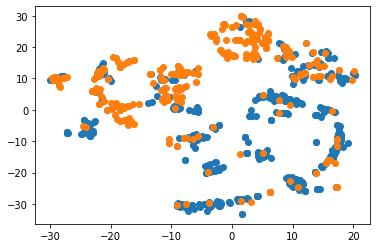

In [55]:
plt.scatter(x_tsne[y==0][:,0], x_tsne[y==0][:,1])
plt.scatter(x_tsne[y==1][:,0], x_tsne[y==1][:,1])

In [56]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x, y)

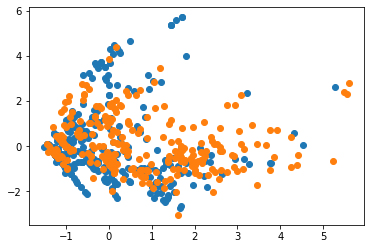

In [57]:
plt.scatter(x_pca[y==0][:,0], x_pca[y==0][:,1])
plt.scatter(x_pca[y==1][:,0], x_pca[y==1][:,1])

In [58]:
tsne3d = TSNE(n_components=3, verbose=2, n_iter=500)
x_tsne3d = tsne3d.fit_transform(x, y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 757 samples in 0.000s...
[t-SNE] Computed neighbors for 757 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 757 / 757
[t-SNE] Mean sigma: 0.060510
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 63.6720810, gradient norm = 0.2438785 (50 iterations in 0.284s)
[t-SNE] Iteration 100: error = 61.5090714, gradient norm = 0.2108031 (50 iterations in 0.303s)
[t-SNE] Iteration 150: error = 61.7771111, gradient norm = 0.1913444 (50 iterations in 0.217s)
[t-SNE] Iteration 200: error = 61.9122505, gradient norm = 0.1979549 (50 iterations in 0.250s)
[t-SNE] Iteration 250: error = 61.9339561, gradient norm = 0.2121593 (50 iterations in 0.370s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.933956
[t-SNE] Iteration 300: error = 0.5047397, gradient norm = 0.0010159 (50 iterations in 0.369s)
[t-SNE] Iteration 350: error = 0.4436343, gradient norm = 0.0008301 (

<IPython.core.display.Javascript object>


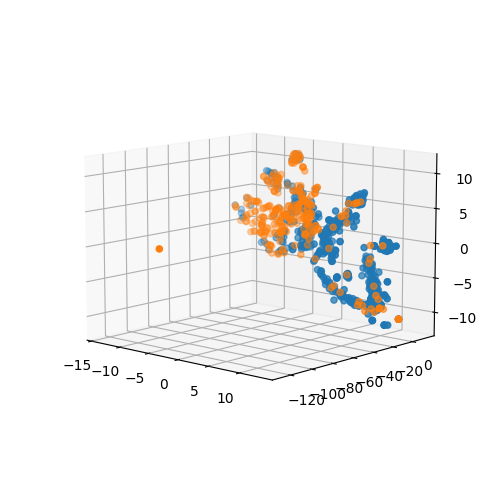

In [63]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_tsne3d[y==0][:,0], x_tsne3d[y==0][:,1], x_tsne3d[y==0][:,2])
ax.scatter(x_tsne3d[y==1][:,0], x_tsne3d[y==1][:,1], x_tsne3d[y==1][:,2])
plt.show()

In [65]:
pca3d = PCA(n_components=3)
x_pca3d = pca3d.fit_transform(x, y)

<IPython.core.display.Javascript object>


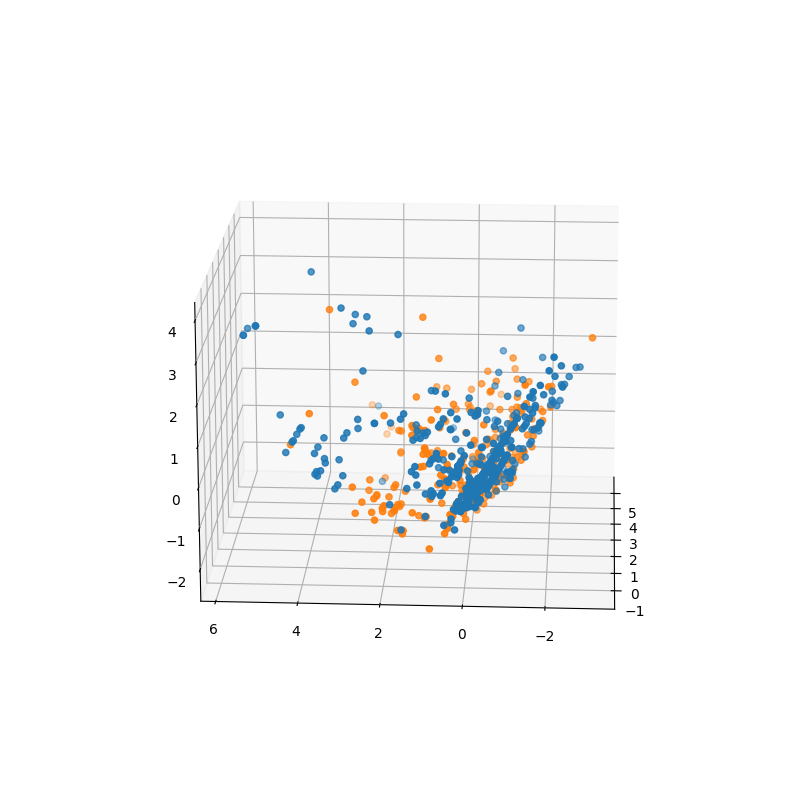

In [68]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca3d[y==0][:,0], x_pca3d[y==0][:,1], x_pca3d[y==0][:,2])
ax.scatter(x_pca3d[y==1][:,0], x_pca3d[y==1][:,1], x_pca3d[y==1][:,2])
plt.show()